#### Library yang Dibutuhkan:

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st

# Statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice)! 

Ceritakan kepada tim bisnis apa makna dari nilai-nilai tersebut!

Ekspektasi output : 
* ukuran pemusatan
* ukuran penyebaran
* interpretasi

In [31]:
df = pd.read_csv('train.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Ukuran Pemusatan

In [32]:
print('modus:',df['SalePrice'].mode()[0])
print('mean:',df['SalePrice'].mean())
print('median / Q2 (50%):',df['SalePrice'].median())
print('Q1 (25%):',df['SalePrice'].quantile(0.25))
print('Q3 (75%):',df['SalePrice'].quantile(0.75))

modus: 140000
mean: 180921.19589041095
median / Q2 (50%): 163000.0
Q1 (25%): 129975.0
Q3 (75%): 214000.0


#### Interpretasi

- **Modus:** Mayoritas harga rumah berada di angka **140,000 USD**
- **Rata-rata:** Harga 1 rumah berkisar di angka **180,921 USD**
- **Median (Q2):** 50% harga rumah berada di bawah **163,000 USD** atau diatas **163,000 USD**
- **Q1:** 25% harga rumah berada di bawah **129,975 USD**
- **Q3:** 25% harga rumah berada di atas **214,000 USD**

#### Ukuran Penyebaran

In [50]:
print('Range:',df['SalePrice'].max()-df['SalePrice'].min())
print('standard deviation:',df['SalePrice'].std())
print('variance:',df['SalePrice'].var())
print('Inter Quartile Range (IQR):',df['SalePrice'].quantile(0.75)-df['SalePrice'].quantile(0.25))

Range: 720100
standard deviation: 79442.50288288663
variance: 6311111264.297451
Inter Quartile Range (IQR): 84025.0


#### Interpretasi

- $\textbf{Rentang:}$ harga rumah paling mahal dan paling murah yaitu **720100 USD**
- $\textbf{std/var:}$ harga rumah berkisar antara **180,921 - 79,442 USD** sampai **180,921 + 79,442 USD**
- $\textbf{interquartile:}$ jarak antara Q3 dan Q1 sebesar **8884025.0 USD**

# Statistika deskriptif untuk variabel harga rumah (Column Name : SalePrice) setiap tahunnya (Column Name : YrSold)!
Secara deskriptif jelaskan apakah ada perbedaan setiap tahunnya atau tidak?

Ekspektasi output : 
* ukuran pemusatan
* ukuran penyebaran
* interpretasi

In [35]:
def Q1(x):
    return x.quantile(0.25)
def Q3(x):
    return x.quantile(0.75)

#### Ukuran Pemusatan dan Penyebaran

In [36]:
data_agg = df.groupby('YrSold').agg({'SalePrice': ['mean','median',Q1,Q3,'std','var']}).reset_index()
data_agg.columns = ['Tahun','Mean','Median','Q1','Q3','Std','var']
data_agg.sort_values('Mean',ascending = False)

,Tahun,Mean,Median,Q1,Q3,Std,var
1,2007,186063.151976,167000,129900,219500.0,85768.171410,7.356179e+09
0,2006,182549.458599,163995,131375,218782.5,79426.838855,6.308623e+09
3,2009,179432.103550,162000,125250,212750.0,80879.237311,6.541451e+09
4,2010,177393.674286,155000,128100,213250.0,80451.280085,6.472408e+09
2,2008,177360.838816,164000,131250,207000.0,69735.610685,4.863055e+09


#### Interpretasi

terdapat perbedaan nilai mean, median, Q1, Q2, stabdard Rata-rata harga rumah paling tinggi ada pada **tahun 2007** dan rata-rata terendah pada **tahun 2008**, kemudian jika dilihat dari standard deviation dan variancenya pada tahun 2007 memiliki beragam harga rumah dibandingkan dengan harga rumah pada tahun yang lainnya.

# Grafik Histogram Distribusi rumah

Text(180921, 125, 'Mean')

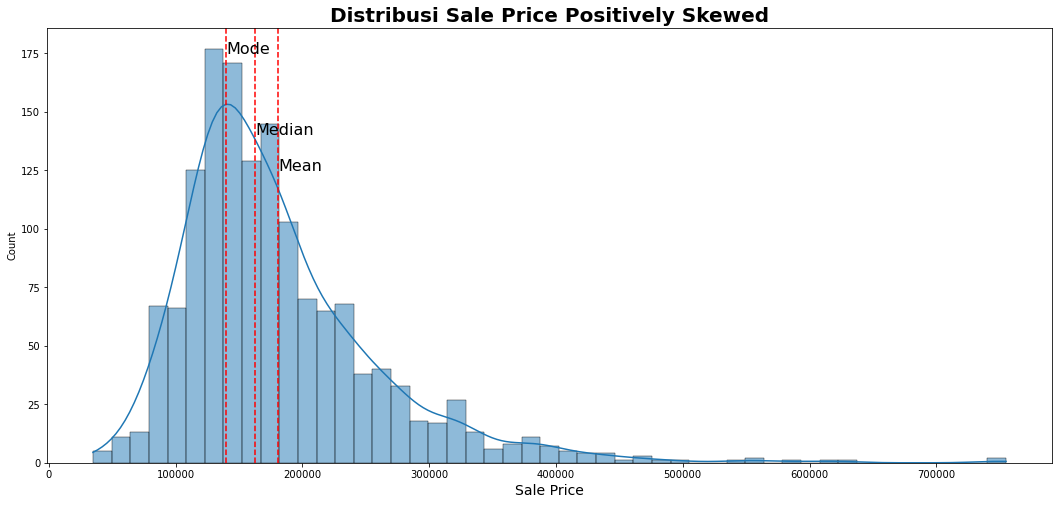

In [37]:
#histogram plot
plt.figure(figsize=(18,8))
ax = sns.histplot(df, x='SalePrice', linewidth=0.4, kde = True)

# add label
plt.xlabel('Sale Price', fontsize = 14)
plt.title('Distribusi Sale Price Positively Skewed',fontsize = 20,fontweight='bold')
plt.axvline(140000, linestyle='--', color='red')
plt.axvline(163000, linestyle='--', color='red')
plt.axvline(180921.19589041095, linestyle='--', color='red')
plt.text(140000, 175, s='Mode',fontsize=16)
plt.text(163000, 140, s='Median',fontsize=16)
plt.text(180921, 125, s='Mean',fontsize=16)

#### Analisa dan Interpretasi:

**Analisa:** 
Dari histogram diatas diketahui bahwa harga rumah memiliki sebaran yang skewed ke arah skewed yang positif/**Skewed Right (Positively Skewed)** dimana nilai **mode < median < mean**. 

**Interpretasi:** 
Dalam penentuan harga rumah jika kita menggunakan mean maka harga rumah akan lebih besar/mahal dibandingkan dengan menggunakan median. Sehingga, untuk data tersebut **lebih baik menggunakan median dibandingkan dengan menggunakan mean**.

# Hypotesis Testing

#### ● Penentuan hipotesis

Apakah setiap tahunnya harga rumah itu pasti naik? apakah harga rumah setiap tahunnya sama atau berbeda?
* H0 : rata-rata harga rumah setiap tahun **sama**
* H1 : rata-rata harga rumah setiap tahun **berbeda** 

#### ● Pengujian yang digunakan
Kita akan melakukan **Anova (F-Distribution)**

#### ● Deteksi asumsi beserta cara penanganannya

In [38]:
data_agg = df.groupby('YrSold').agg({'SalePrice': ['mean']}).reset_index()
data_agg.columns = ['Tahun','Mean']
data_agg

,Tahun,Mean
0,2006,182549.458599
1,2007,186063.151976
2,2008,177360.838816
3,2009,179432.103550
4,2010,177393.674286


#### ● Hasil Pengujian Hipotesis

In [39]:
# Pengujian hipotesis dengan cara Anova

df1 = df[df['YrSold'] == 2006]
df2 = df[df['YrSold'] == 2007]
df3 = df[df['YrSold'] == 2008]
df4 = df[df['YrSold'] == 2009]
df5 = df[df['YrSold'] == 2010]

Anova = st.f_oneway(df1['SalePrice'], df2['SalePrice'], df3['SalePrice'], df4['SalePrice'], df5['SalePrice'])
Anova

F_onewayResult(statistic=0.6455252211679311, pvalue=0.6300887663573457)

In [40]:
p_value = Anova.pvalue
alpha = 0.05
print('P-Value :',p_value)

P-Value : 0.6300887663573457


In [41]:
if p_value >= alpha:
    print('Tidak cukup bukti menyatakan bahwa rata-rata harga rumah setiap tahun sama')
else:
    print('Cukup bukti menyatakan (Tolak H0) bahwa rata-rata harga rumah setiap tahun berbeda')

Tidak cukup bukti menyatakan bahwa rata-rata harga rumah setiap tahun sama


#### ● Hasil uji hipotesis

hasil uji hipotesis menyatakan bahwa **p-value > alpha**, sehingga diambil keputusan bahwa tidak ada perbedaan yang begitu signifikan harga rumah setiap tahunnya. 

#### ● Kesimpulan dan interpretasi

Dapat disimpukan bahwa rata-rata harga rumah tidak mengalami kenaikan pada setiap tahunnya.